In [1]:
def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

In [2]:
def median_filter(src, ksize):
    d = int((ksize-1)/2)
    h, w = src.shape[0], src.shape[1]
    

    src1 = np.pad(src, [d,d], mode='symmetric')
    
    dst = src.copy()

    for y in range(0, h):
        for x in range(0, w):

            dst[y][x] = np.median(src1[y:y+2*d+1, x:x+2*d+1])

    return dst

In [3]:
import itertools
def median_kai6(src, ksize,t,N):
    d = int((ksize-1)/2)
    #ndarray.shapeで画像サイズ（行（高さ）, 列（幅））を取得
    h, w = src.shape[0], src.shape[1]
    # 出力画像用の配列（要素は入力画像と同じ）
    dst = src.copy()
    #N回処理を繰り返す
    for i in range(N):
        #周期対称拡張symmetric 対称な補完 - ABCCBAABC の様になる
        src1 = np.pad(dst, [d,d], mode='symmetric')
        
        for y in range(0, h):
            for x in range(0, w):
                for k in dst[y][x]:
                    #注目する画素が0または255のとき
                    if k==0 or k==255:
                        #注目する画素の周りの画素を取得
                        p=src1[y:y+2*d+1, x:x+2*d+1]
                        #多次元を1次元にする
                        q=p.ravel()
                        
                        n1 = []   
                        
                        for i in q:
                            #注目する画素の周りの画素が0または255以外の時n1に追加
                            if i != 0 and i != 255: 
                                n1.append(i)
                        #注目する画素とn1の平均との差の絶対値がしきい値tより大きいとき
                        if abs(k-np.median(n1))>t:
                            #n1の平均にその画素を置き換える
                            dst[y][x] = np.mean(n1)
    return dst

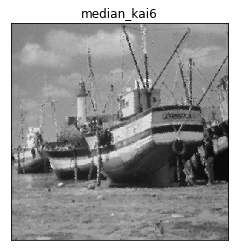

median_kai6_MSE:
427.60086822509766


In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('idata4.bmp')

img2 = cv2.imread('rdata4.bmp')

x=median_kai6(img,5,5,2)

plt.imshow(x),plt.title('median_kai6')
plt.xticks([]), plt.yticks([])

plt.show()

a=mse(img2,x)

print('median_kai6_MSE:')
print(a)